# Projet de détection de Langue

<ul>
    <li> Nom : NGUAZONG TSAFACK 
    <li> Prénom : Aurel
    <li> Matricule : 20P001
    <li> Classe : AIA 4
    

## 1. Importation et lecture des données

In [1]:
#import des bibliothèques
import pandas as pd
import numpy as np

In [2]:
# Chargement du fichier 
df = pd.read_csv('Languages.csv')
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [3]:
df

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [4]:
# Connaitre le nombre de ligne et de colonne dans les données
df.shape

(10337, 2)

## 2. Exploitation des données

In [5]:
# Avoir les information sur les nom de colonnes, leur type et le nombre de valeurs non manquantes par colonne
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


Il n'y a pas de valeur manquante donc c'est déjà un bon point

In [6]:
df.columns

Index(['Text', 'Language'], dtype='object')

In [9]:
#Vérification de valeurs duppliquées
df.duplicated().sum()

66

In [10]:
#Suppression des valeurs duppliquées
df.drop_duplicates(keep='first', inplace=True)
df.duplicated().sum()

0

#### Note : Vue que les données sont rangées sans aucune manqante ou de colonnes à renommer, l'on considère la dataset ayant été un minimum néttoyé au préalable 

In [11]:
#compter le nombre d'occurence pour chaque langue
count_language = df['Language'].value_counts()
print(count_language)

Language
English       1382
French        1007
Spanish        816
Portugeese     736
Italian        694
Russian        688
Sweedish       673
Malayalam      591
Dutch          542
Arabic         532
Turkish        471
German         465
Tamil          464
Danish         424
Kannada        366
Greek          358
Hindi           62
Name: count, dtype: int64


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10271 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10271 non-null  object
 1   Language  10271 non-null  object
dtypes: object(2)
memory usage: 240.7+ KB


In [18]:
#Afficher tout le text sans tronqué pour bien voir le contenu des textes
print(pd.get_option('display.max_colwidth'))
pd.set_option('display.max_colwidth', None)
df

None


,Text,Language
0,"Nature, in the broadest sense, is the natural, physical, material world or universe.",English
1,"""Nature"" can refer to the phenomena of the physical world, and also to life in general.",English
2,"The study of nature is a large, if not the only, part of science.",English
3,"Although humans are part of nature, human activity is often understood as a separate category from other natural phenomena.",English
4,"[1] The word nature is borrowed from the Old French nature and is derived from the Latin word natura, or ""essential qualities, innate disposition"", and in ancient times, literally meant ""birth"".",English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒಳ್ಳೆಯದನ್ನು ನೀಡೋಣ.,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್ನು ಬದಲಾಯಿಸಿದಳು ಆದರೆ ನಿಧಾನವಾಗಿ ಮತ್ತು ತಾಳ್ಮೆಯಿಂದ ಅವಳು ಒಂದು ದಿನ ಮೆಲ್ಲಿ ಆಗಲು ಪ್ರಾರಂಭಿಸಿದಳು ಮೆಲ್ಲಿ ಮತ್ತು ಟೆರ್ರಿ ಮತ್ತೆ ಮರಿಯನ್ ಅವರನ್ನು ಭೇಟಿಯಾಗಲು ಬಂದರು ಓಹ್ ಹಲೋ ನೀವಿರಿ ಆದ್ದರಿಂದ ನಮಗೆ ಮರಿಯನ್ ಹೇಳಿ.,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ್ಲವನ್ನೂ ಹೇಳಿದೆ ಮತ್ತು ಅವಳು ಆ ಸಮಯದಿಂದ ತುಂಬಾ ಬದಲಾಗಿದ್ದಾಳೆ.,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ನಾನು ess ಹಿಸಿದ್ದೇನೆ.,Kannada


## 3.Analyse uni-variée

In [25]:
# Visialization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

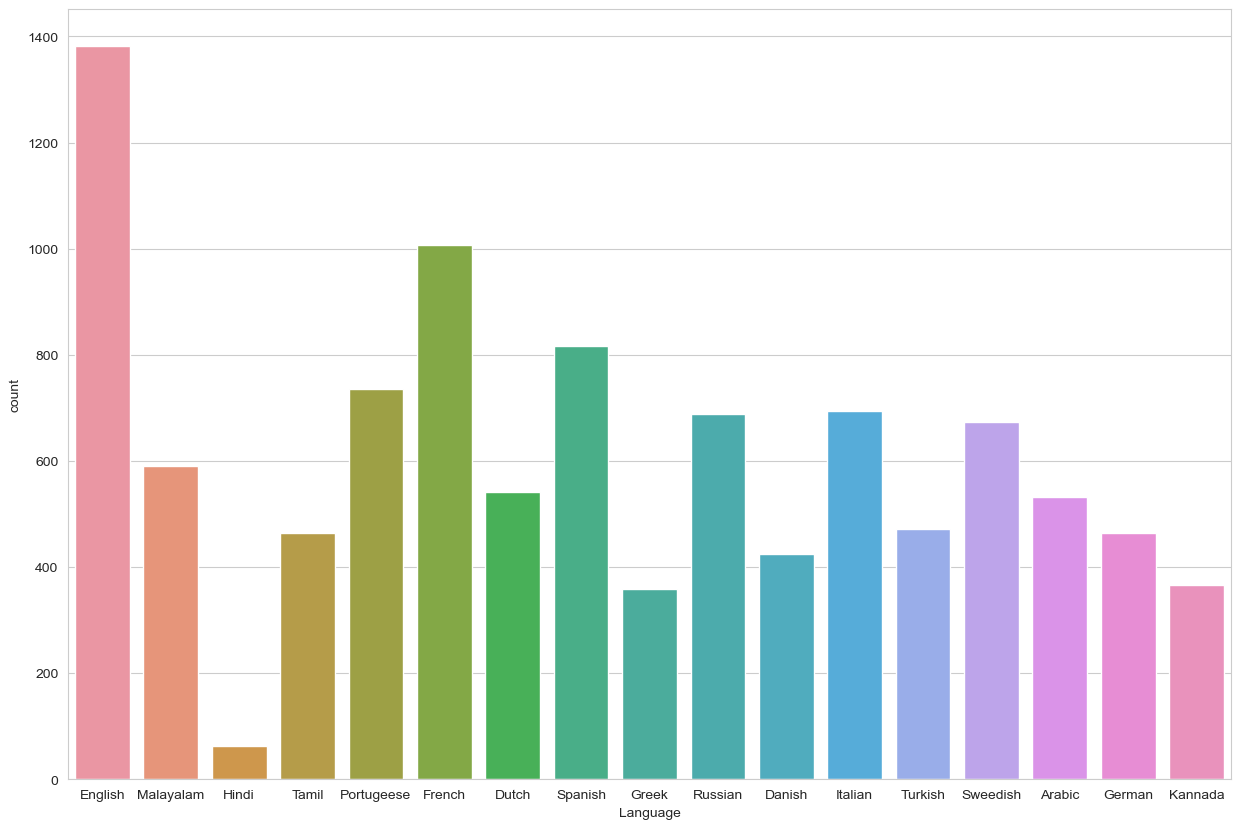

In [31]:
# Barplot describes the count of the class labels
plt.figure(figsize = (15, 10))
sns.countplot(data = df, x = 'Language');

## 3. Prétraitement des données

In [34]:
#Trier les données en ordre croissant en fonction de Language
df_trier = df.sort_values(by=["Language"], ascending = True)
df_trier

,Text,Language
9417,كنت أفضل لو لم تفعل.,Arabic
9165,كما إستوحت موسوعة لاروس طريقة عمل ويكيبيديا لإنشاء موسوعة على الإنترنت يحررها مساهمون غير متخصصين، لكن مع اختلاف في التطبيق فموسوعة لاروس تسمح لمستخدمها أن يكتب مقالاً ويحق له وحده أن يحرره، وهذا النموذج يتفق مع ما تطبقه خدمة نول من جوجل.,Arabic
9164,مشاريع أخرى مستقلة عن مؤسسة ويكيميديا استوحت الفكرة من طريقة عمل ويكيبيديا التي تعتمد على نظام الويكي والعمل الجماعي، من هذه المشاريع، موسوعة المعرفة، وموسوعة الحياة.,Arabic
9163,[111] أحدث مشاريع ويكيميديا هو ويكي جامعة مشروع يهدف إلى دعم التعليم الحر واستضافة مصادر تعليمية مجانية.,Arabic
9162,ويكيميديا تطلق مشاريع عديدة منذ ذلك الحين.,Arabic
...,...,...
8219,yeterince teşekkür edemem Mühim değil.,Turkish
8220,bahsetme.,Turkish
8221,istediğin zaman.,Turkish
8209,biraz dondurmaya ne dersin?,Turkish


In [35]:
import nltk

In [36]:
# telecharger les stopwords et les ponctuation
#%%time
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TSAFACK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:
def trait_text(text):

    #Removes unicode strings like "\u002c"  
    text = re.sub(r'(\\u[0-9A-Fa-f]+)',r'', text)       

    #Convert to lowercase
    text = text.lower()
    
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('_;__', '', text)
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)

    
    return text

In [54]:
#Suppression des ponctuation et caractères spéciaux 

import re

df_trier['Cleaned_Text'] = df_trier['Text'].apply(lambda x: trait_text(x))
df_trier

,Text,Language,Cleaned_Text
9417,كنت أفضل لو لم تفعل.,Arabic,كنت أفضل لو لم تفعل
9165,كما إستوحت موسوعة لاروس طريقة عمل ويكيبيديا لإنشاء موسوعة على الإنترنت يحررها مساهمون غير متخصصين، لكن مع اختلاف في التطبيق فموسوعة لاروس تسمح لمستخدمها أن يكتب مقالاً ويحق له وحده أن يحرره، وهذا النموذج يتفق مع ما تطبقه خدمة نول من جوجل.,Arabic,كما إستوحت موسوعة لاروس طريقة عمل ويكيبيديا لإنشاء موسوعة على الإنترنت يحررها مساهمون غير متخصصين لكن مع اختلاف في التطبيق فموسوعة لاروس تسمح لمستخدمها أن يكتب مقالا ويحق له وحده أن يحرره وهذا النموذج يتفق مع ما تطبقه خدمة نول من جوجل
9164,مشاريع أخرى مستقلة عن مؤسسة ويكيميديا استوحت الفكرة من طريقة عمل ويكيبيديا التي تعتمد على نظام الويكي والعمل الجماعي، من هذه المشاريع، موسوعة المعرفة، وموسوعة الحياة.,Arabic,مشاريع أخرى مستقلة عن مؤسسة ويكيميديا استوحت الفكرة من طريقة عمل ويكيبيديا التي تعتمد على نظام الويكي والعمل الجماعي من هذه المشاريع موسوعة المعرفة وموسوعة الحياة
9163,[111] أحدث مشاريع ويكيميديا هو ويكي جامعة مشروع يهدف إلى دعم التعليم الحر واستضافة مصادر تعليمية مجانية.,Arabic,أحدث مشاريع ويكيميديا هو ويكي جامعة مشروع يهدف إلى دعم التعليم الحر واستضافة مصادر تعليمية مجانية
9162,ويكيميديا تطلق مشاريع عديدة منذ ذلك الحين.,Arabic,ويكيميديا تطلق مشاريع عديدة منذ ذلك الحين
...,...,...,...
8219,yeterince teşekkür edemem Mühim değil.,Turkish,yeterince teşekkür edemem mühim değil
8220,bahsetme.,Turkish,bahsetme
8221,istediğin zaman.,Turkish,istediğin zaman
8209,biraz dondurmaya ne dersin?,Turkish,biraz dondurmaya ne dersin


In [55]:
df_trier['Language'].unique()

array(['Arabic', 'Danish', 'Dutch', 'English', 'French', 'German',
       'Greek', 'Hindi', 'Italian', 'Kannada', 'Malayalam', 'Portugeese',
       'Russian', 'Spanish', 'Sweedish', 'Tamil', 'Turkish'], dtype=object)

In [56]:
#On labelise les langues pour mieux manipuler

from sklearn.preprocessing import LabelEncoder

# Vos données de langues
langues = df_trier['Language']

# Créer une instance de LabelEncoder
label_encoder = LabelEncoder()

# Adapter et transformer les données de langues
langues_labelisees = label_encoder.fit_transform(langues)

# Afficher les résultats
for langue, label in zip(langues, langues_labelisees):
    print(f'Langue : {langue} | Label : {label}')

Langue : Arabic | Label : 0
Langue : Arabic | Label : 0
Langue : Arabic | Label : 0
Langue : Arabic | Label : 0
Langue : Arabic | Label : 0
Langue : Arabic | Label : 0
Langue : Arabic | Label : 0
Langue : Arabic | Label : 0
Langue : Arabic | Label : 0
Langue : Arabic | Label : 0
Langue : Arabic | Label : 0
Langue : Arabic | Label : 0
Langue : Arabic | Label : 0
Langue : Arabic | Label : 0
Langue : Arabic | Label : 0
Langue : Arabic | Label : 0
Langue : Arabic | Label : 0
Langue : Arabic | Label : 0
Langue : Arabic | Label : 0
Langue : Arabic | Label : 0
Langue : Arabic | Label : 0
Langue : Arabic | Label : 0
Langue : Arabic | Label : 0
Langue : Arabic | Label : 0
Langue : Arabic | Label : 0
Langue : Arabic | Label : 0
Langue : Arabic | Label : 0
Langue : Arabic | Label : 0
Langue : Arabic | Label : 0
Langue : Arabic | Label : 0
Langue : Arabic | Label : 0
Langue : Arabic | Label : 0
Langue : Arabic | Label : 0
Langue : Arabic | Label : 0
Langue : Arabic | Label : 0
Langue : Arabic | La

In [58]:
df_trier['Language_labelise'] = langues_labelisees

In [59]:
df_trier

,Text,Language,Cleaned_Text,Language_labelise
9417,كنت أفضل لو لم تفعل.,Arabic,كنت أفضل لو لم تفعل,0
9165,كما إستوحت موسوعة لاروس طريقة عمل ويكيبيديا لإنشاء موسوعة على الإنترنت يحررها مساهمون غير متخصصين، لكن مع اختلاف في التطبيق فموسوعة لاروس تسمح لمستخدمها أن يكتب مقالاً ويحق له وحده أن يحرره، وهذا النموذج يتفق مع ما تطبقه خدمة نول من جوجل.,Arabic,كما إستوحت موسوعة لاروس طريقة عمل ويكيبيديا لإنشاء موسوعة على الإنترنت يحررها مساهمون غير متخصصين لكن مع اختلاف في التطبيق فموسوعة لاروس تسمح لمستخدمها أن يكتب مقالا ويحق له وحده أن يحرره وهذا النموذج يتفق مع ما تطبقه خدمة نول من جوجل,0
9164,مشاريع أخرى مستقلة عن مؤسسة ويكيميديا استوحت الفكرة من طريقة عمل ويكيبيديا التي تعتمد على نظام الويكي والعمل الجماعي، من هذه المشاريع، موسوعة المعرفة، وموسوعة الحياة.,Arabic,مشاريع أخرى مستقلة عن مؤسسة ويكيميديا استوحت الفكرة من طريقة عمل ويكيبيديا التي تعتمد على نظام الويكي والعمل الجماعي من هذه المشاريع موسوعة المعرفة وموسوعة الحياة,0
9163,[111] أحدث مشاريع ويكيميديا هو ويكي جامعة مشروع يهدف إلى دعم التعليم الحر واستضافة مصادر تعليمية مجانية.,Arabic,أحدث مشاريع ويكيميديا هو ويكي جامعة مشروع يهدف إلى دعم التعليم الحر واستضافة مصادر تعليمية مجانية,0
9162,ويكيميديا تطلق مشاريع عديدة منذ ذلك الحين.,Arabic,ويكيميديا تطلق مشاريع عديدة منذ ذلك الحين,0
...,...,...,...,...
8219,yeterince teşekkür edemem Mühim değil.,Turkish,yeterince teşekkür edemem mühim değil,16
8220,bahsetme.,Turkish,bahsetme,16
8221,istediğin zaman.,Turkish,istediğin zaman,16
8209,biraz dondurmaya ne dersin?,Turkish,biraz dondurmaya ne dersin,16


## 5. Séparation des données d'entrainement et de test

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression

In [61]:
# Separe feature and target form data
X = df_trier.loc[:, 'Cleaned_Text']
y = df_trier.loc[:, 'Language_labelise']

print(f"Shape of X: {X.shape}\nshape of y: {y.shape}")

Shape of X: (10271,)
shape of y: (10271,)


In [62]:
# Split in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11, stratify=y)
print(f"Train Data Shape: {X_train.shape}\nTest Data Shape: {X_test.shape}")

Train Data Shape: (8216,)
Test Data Shape: (2055,)


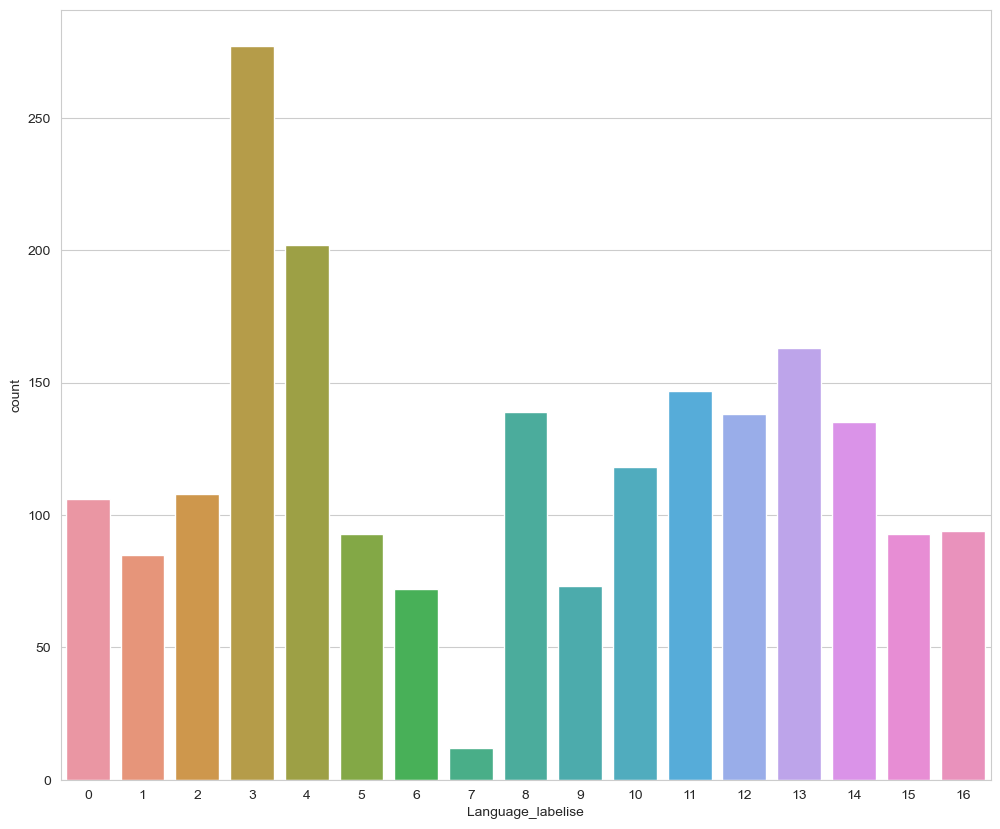

In [64]:
y_test_df = pd.DataFrame(y_test,columns=["Language_labelise"])
# Barplot describes the count of the class labels
plt.figure(figsize = (12, 10))
sns.countplot(data = y_test_df, x = 'Language_labelise');

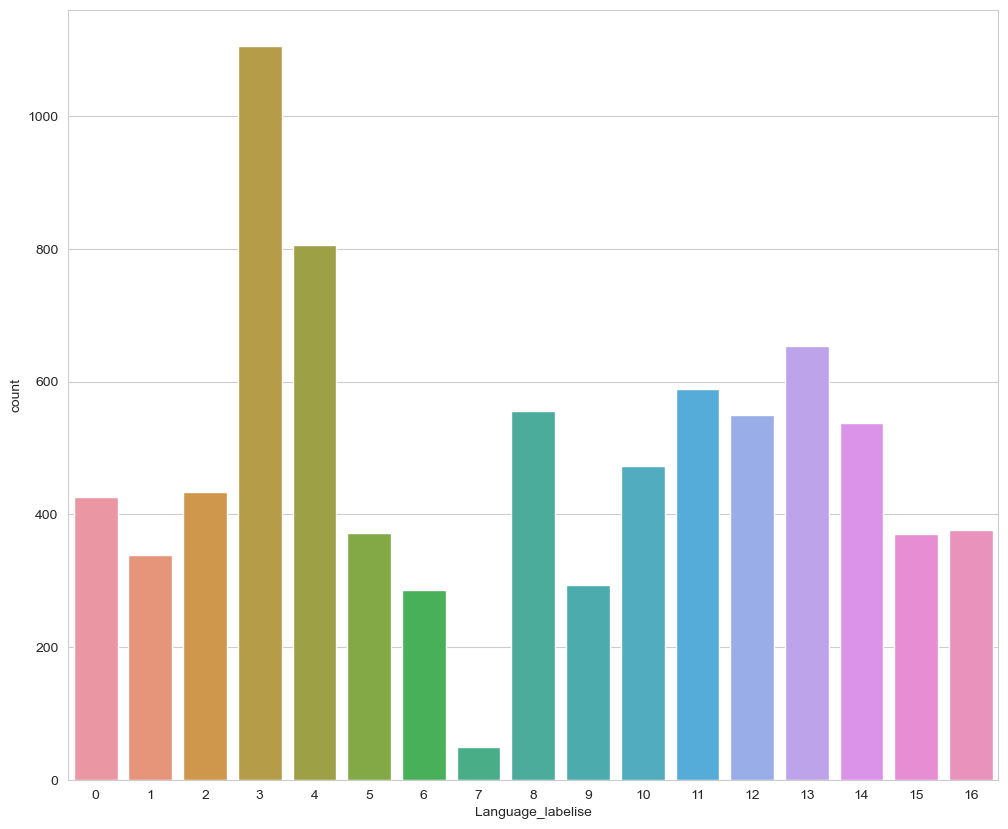

In [65]:
y_train_df = pd.DataFrame(y_train,columns=["Language_labelise"])
# Barplot describes the count of the class labels
plt.figure(figsize = (12, 10))
sns.countplot(data = y_train_df, x = 'Language_labelise');

## 6. Vectorisation des données 

In [66]:
# Computer the vocabulary
cVect = CountVectorizer()
cVect.fit(X_train)

# Let's see the vocabulary that has extracted by the count vextorizer
print('NO.of Tokens: ',len(cVect.vocabulary_.keys()))

NO.of Tokens:  34411


In [67]:
# Vacabulary
vocab = cVect.vocabulary_.keys()
print(vocab)

dict_keys(['la', 'wikimedia', 'foundation', 'ha', 'infatti', 'successivamente', 'dato', 'vita', 'progetti', 'complementari', 'tra', 'quali', 'wiktionary', 'wikibooks', 'wikisource', 'wikispecies', 'wikiquote', 'wikinotizie', 'wikiversità', 'wikivoyage', 'nel', 'settembre', 'edizione', 'in', 'inglese', 'tagliato', 'lo', 'storico', 'traguardo', 'di', 'milioni', 'voci', 'divenendo', 'più', 'vasta', 'enciclopedia', 'mai', 'scritta', 'superando', 'yongle', 'che', 'detenuto', 'tale', 'primato', 'per', 'anni', 'esatti', 'guinness', 'dei', 'primati', 'del', 'wikipedia', 'riportata', 'come', 'grande', 'al', 'mondo', 'this', 'concept', 'of', 'global', 'ocean', 'as', 'continuous', 'body', 'water', 'with', 'relatively', 'free', 'interchange', 'among', 'its', 'parts', 'is', 'fundamental', 'importance', 'to', 'oceanography', 'önümüzdeki', 'cumartesi', 'boş', 'musun', 'целью', 'машинного', 'обучения', 'является', 'частичная', 'или', 'полная', 'автоматизация', 'решения', 'сложных', 'профессиональных',

In [68]:
# document term vector (dtv)
dtv = cVect.transform(X_train)
print(dtv)

  (0, 3897)	1
  (0, 5071)	1
  (0, 8564)	1
  (0, 9796)	1
  (0, 10968)	1
  (0, 12293)	1
  (0, 16977)	1
  (0, 17404)	1
  (0, 20470)	1
  (0, 21582)	1
  (0, 23045)	1
  (0, 23500)	1
  (0, 23515)	1
  (0, 23522)	1
  (0, 23560)	1
  (0, 23565)	1
  (0, 23566)	1
  (0, 23571)	1
  (0, 23574)	1
  (0, 23584)	1
  (1, 593)	1
  (1, 1057)	1
  (1, 3404)	1
  (1, 3778)	1
  (1, 5217)	1
  :	:
  (8215, 30770)	1
  (8215, 30785)	1
  (8215, 30821)	1
  (8215, 30830)	1
  (8215, 30874)	1
  (8215, 30889)	4
  (8215, 30903)	1
  (8215, 30919)	1
  (8215, 31056)	1
  (8215, 31084)	1
  (8215, 31143)	2
  (8215, 31145)	2
  (8215, 31233)	1
  (8215, 31259)	1
  (8215, 31381)	1
  (8215, 31464)	1
  (8215, 31510)	1
  (8215, 31581)	1
  (8215, 31583)	1
  (8215, 31586)	1
  (8215, 31587)	1
  (8215, 31814)	1
  (8215, 31864)	1
  (8215, 31895)	1
  (8215, 31998)	1


In [69]:
dtv = dtv.toarray()
print(f"Number of Observations: {dtv.shape[0]}\nTokens/Features: {dtv.shape[1]}")

Number of Observations: 8216
Tokens/Features: 34411


In [70]:
dtv[0, 100]

0

## 7. Régression logistique

In [86]:
%%time
lr = LogisticRegression()
lr.fit(dtv, y_train)

CPU times: total: 2min 10s
Wall time: 57.1 s


LogisticRegression()

### Evaluation sur les données de test

In [87]:
#Accuracy Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [88]:
# Preprocess the test data
test_dtv = cVect.transform(X_test)
test_dtv = test_dtv.toarray()
print(f"Number of Observations: {test_dtv.shape[0]}\nTokens/Features: {test_dtv.shape[1]}")

Number of Observations: 2055
Tokens/Features: 34411


In [89]:
%%time
pred = lr.predict(test_dtv)

CPU times: total: 797 ms
Wall time: 800 ms


In [90]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  95.42579075425792


In [91]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       106
           1       0.95      0.92      0.93        85
           2       1.00      0.90      0.95       108
           3       0.99      0.97      0.98       277
           4       0.98      0.97      0.97       202
           5       1.00      0.98      0.99        93
           6       1.00      0.96      0.98        72
           7       1.00      0.83      0.91        12
           8       0.95      0.98      0.96       139
           9       1.00      0.93      0.96        73
          10       1.00      0.97      0.99       118
          11       0.99      0.94      0.97       147
          12       0.70      0.99      0.82       138
          13       0.92      0.94      0.93       163
          14       0.98      0.93      0.95       135
          15       1.00      0.97      0.98        93
          16       0.99      0.94      0.96        94

    accuracy              

In [92]:
#Vérification s'il y'a cas d'overfiting
from sklearn.model_selection import cross_val_score, learning_curve


In [96]:
# Validation croisée
scores = cross_val_score(lr, dtv, y_train, cv=5)  # 5-fold cross-validation

print("Scores de validation croisée :", scores)
print("Score moyen de validation croisée :", scores.mean())

Scores de validation croisée : [0.95681265 0.93852708 0.95922094 0.94400487 0.95556908]
Score moyen de validation croisée : 0.9508269248141122


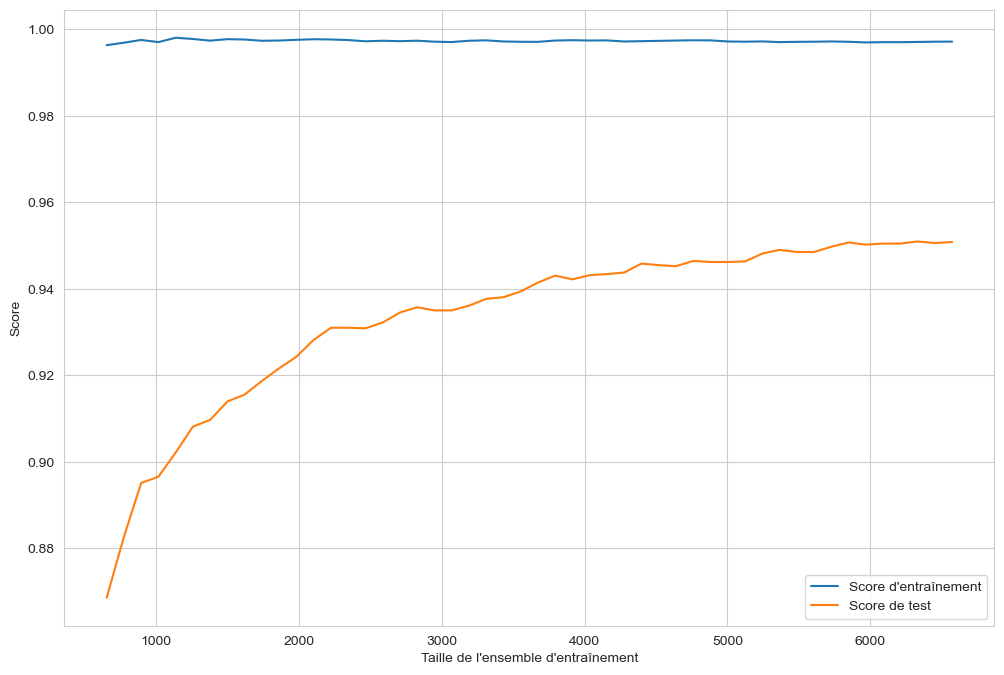

In [97]:
# Courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(lr, dtv, y_train, cv=5,
                                                        train_sizes = np.linspace(0.1, 1, 50), scoring = 'accuracy')

plt.figure(figsize = (12, 8))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Score d\'entraînement')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Score de test')
plt.xlabel('Taille de l\'ensemble d\'entraînement')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

In [107]:
def modele (x):
    text = trait_text(x)
    text = [text]
    t_dtv = cVect.transform(text).toarray()
    
    pred = lr.predict(t_dtv)
    
    return pred

In [108]:
def predict():
    lang = sorted(df["Language"].unique())
    text = input('Enter text: ')
    pred = modele(text)
    y = pred[0]
    print('Ce texte est écrit en : ' + lang[y] )

In [109]:
predict()

Enter text: I have a money
Ce texte est écrit en : English


In [110]:
import pickle
filename = 'language.sav'
pickle.dump(lr,open(filename,'wb'))

In [ ]:
loaded